# Explore here

In [7]:
import pandas as pd

new_file_path = 'https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'
new_data = pd.read_csv(new_file_path)

new_data_info = new_data.info()
new_data_head = new_data.head()
new_data_head, new_data_info



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                        --------------  ----- 
 0   age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"  41188 non-null  object
dtypes: object(1)
memory usage: 321.9+ KB


(  age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"
 0  56;"housemaid";"married";"basic.4y";"no";"no";...                                                                                                                                                                          
 1  57;"services";"married";"high.school";"unknown...                                                                                                                                                                          
 2  37;"services";"married";"high.school";"no";"ye...                                                                                                                                                                          
 3  40;"admin.";"married";"basic.6y";"no";"no";"no...                                                   

In [8]:
new_data_corrected = pd.read_csv(new_file_path, delimiter=';')

new_data_corrected_info = new_data_corrected.info()
new_data_corrected_head = new_data_corrected.head()
new_data_corrected_head, new_data_corrected_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

(   age        job  marital    education  default housing loan    contact  \
 0   56  housemaid  married     basic.4y       no      no   no  telephone   
 1   57   services  married  high.school  unknown      no   no  telephone   
 2   37   services  married  high.school       no     yes   no  telephone   
 3   40     admin.  married     basic.6y       no      no   no  telephone   
 4   56   services  married  high.school       no      no  yes  telephone   
 
   month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
 0   may         mon  ...         1    999         0  nonexistent          1.1   
 1   may         mon  ...         1    999         0  nonexistent          1.1   
 2   may         mon  ...         1    999         0  nonexistent          1.1   
 3   may         mon  ...         1    999         0  nonexistent          1.1   
 4   may         mon  ...         1    999         0  nonexistent          1.1   
 
    cons.price.idx  cons.conf.idx  euribor

(               age      duration      campaign         pdays      previous  \
 count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
 mean      40.02406    258.285010      2.567593    962.475454      0.172963   
 std       10.42125    259.279249      2.770014    186.910907      0.494901   
 min       17.00000      0.000000      1.000000      0.000000      0.000000   
 25%       32.00000    102.000000      1.000000    999.000000      0.000000   
 50%       38.00000    180.000000      2.000000    999.000000      0.000000   
 75%       47.00000    319.000000      3.000000    999.000000      0.000000   
 max       98.00000   4918.000000     56.000000    999.000000      7.000000   
 
        emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
 count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
 mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
 std        1.570960        0.578840     

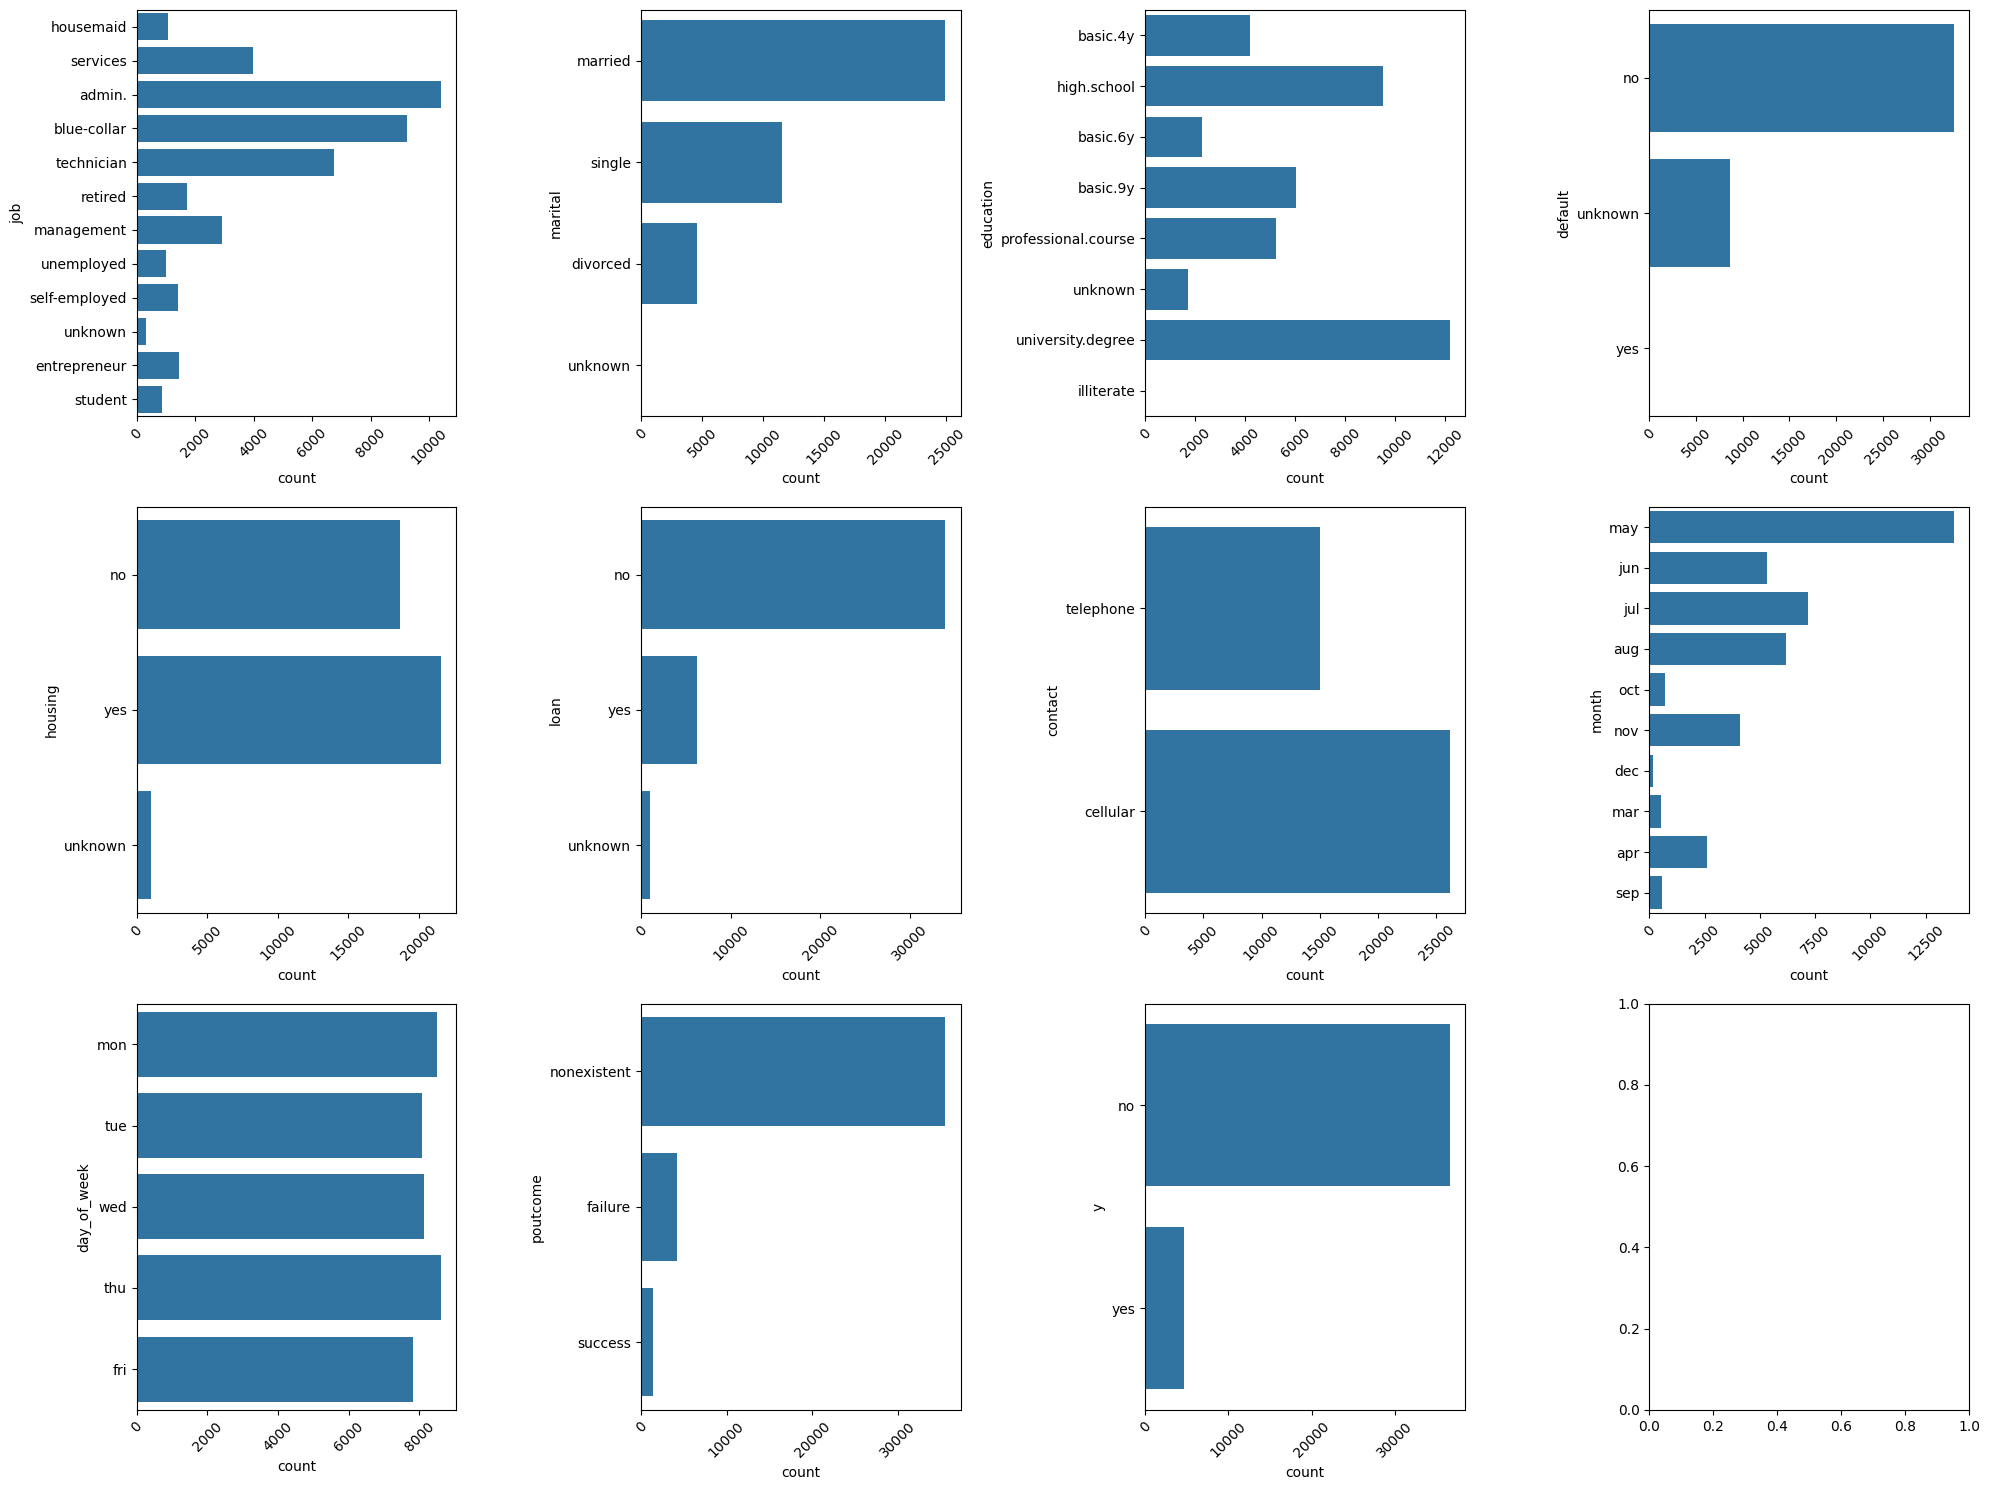

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_summary = new_data_corrected.describe()

fig, ax = plt.subplots(3, 4, figsize=(20, 15))
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
for variable, subplot in zip(categorical_vars, ax.flatten()):
    sns.countplot(new_data_corrected[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()

target_distribution = new_data_corrected['y'].value_counts()

numerical_summary, target_distribution


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

new_data_encoded = pd.get_dummies(new_data_corrected, drop_first=True)

X = new_data_encoded.drop('y_yes', axis=1)
y = new_data_encoded['y_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

logistic_model = LogisticRegression(max_iter=1000) 
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9098082058752124,
 array([[7097,  206],
        [ 537,  398]]),
 '              precision    recall  f1-score   support\n\n       False       0.93      0.97      0.95      7303\n        True       0.66      0.43      0.52       935\n\n    accuracy                           0.91      8238\n   macro avg       0.79      0.70      0.73      8238\nweighted avg       0.90      0.91      0.90      8238\n')

Análisis

El modelo tiene una alta precisión general, pero la capacidad de predecir positivos (clientes que suscriben) es bastante baja en comparación con los negativos. Esto se refleja en un recall y F1-score relativamente bajos para la clase 1.

La diferencia en el desempeño entre las clases sugiere que el modelo podría estar sesgado hacia la clase mayoritaria (no suscribe).

In [11]:
logistic_model_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')

logistic_model_balanced.fit(X_train, y_train)

y_pred_balanced = logistic_model_balanced.predict(X_test)

accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)
class_report_balanced = classification_report(y_test, y_pred_balanced)

accuracy_balanced, conf_matrix_balanced, class_report_balanced


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.855668851663025,
 array([[6214, 1089],
        [ 100,  835]]),
 '              precision    recall  f1-score   support\n\n       False       0.98      0.85      0.91      7303\n        True       0.43      0.89      0.58       935\n\n    accuracy                           0.86      8238\n   macro avg       0.71      0.87      0.75      8238\nweighted avg       0.92      0.86      0.88      8238\n')

La optimización dió como resultado en un modelo más equilibrado ne reconocer ambas clases. Si es que se valora más la capacidad de identificar a todos los posibles suscriptores, incluso a costa de aceptar más falsos positivos, este modelo optimizado podría ser más apropiado.